``Introduction``

`Summary Statistics`
mean, median, standard deviation and other statistical measures

In [17]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/raw_data/benin-malanville.csv')

print(data.head())

summary_stats = data.describe().transpose()

print(summary_stats)


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
                  co

``Data Quality Check``

In [18]:

def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5* IQR
  upper_bound = Q3 + 1.5* IQR
  outliers = df[(df[column] < lower_bound) | df[column] > upper_bound]
  return outliers


columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


outliers = {}
for column in columns_to_check:
  outliers[column] = detect_outliers(data, column)
  
  
print("Missing values: \n", data.isnull().sum())
negative_values = data[columns_to_check] < 0
print("Negative Values: \n", negative_values)
for column in columns_to_check:
    print(f"Outliers in {column}: {len(outliers[column])}")

Missing values: 
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Negative Values: 
          GHI   DNI   DHI   ModA   ModB     WS  WSgust
0       True  True  True  False  False  False   False
1       True  True  True  False  False  False   False
2       True  True  True  False  False  False   False
3       True  True  True  False  False  False   False
4       True  True  True  False  False  False   False
...      ...   ...   ...    ...    ...    ...     ...
525595  True  True  True  False  False  False   False
525596  True  True  True  False  False  False   False
525597  

`Time Series Analysis`

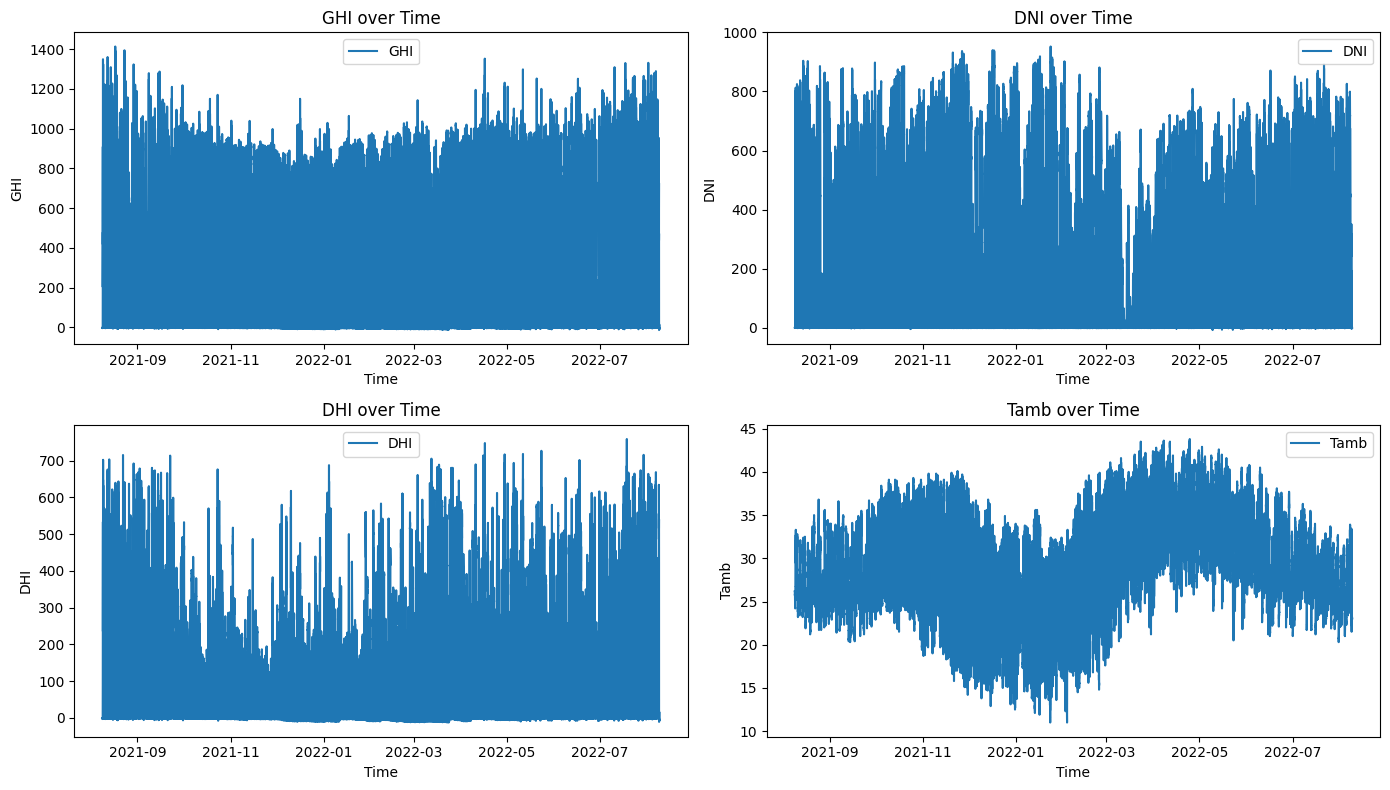

In [19]:
import matplotlib.pyplot as plt

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data.set_index('Timestamp', inplace=True)

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(data.index, data['GHI'], label='GHI')
plt.title('GHI over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(data.index, data['DNI'], label='DNI')
plt.title('DNI over Time')
plt.xlabel('Time')
plt.ylabel('DNI')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(data.index, data['DHI'], label='DHI')
plt.title('DHI over Time')
plt.xlabel('Time')
plt.ylabel('DHI')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(data.index, data['Tamb'], label='Tamb')
plt.title("Tamb over Time")
plt.xlabel('Time')
plt.ylabel('Tamb')
plt.legend()

plt.tight_layout()
plt.show()